## Figure 5: 50K Debt Cancellation by Race

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [1]:
*ssc install dubois
*ssc install combomarginsplot
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [2]:
use data/scfstudentdebt2019, clear

In [3]:
xtile incomedecile=income [pw=wgt], n(10)
label var incomedecile "Catherine/Yannelis income deciles"
label define incomedecile 1 "0-10%" 2 "10-20%" 3 "20-30%" 4 "30-40%" 5 "40-50%" ///
6 "50-60%" 7 "60-70%" 8 "70-80%" 9 "80-90%" 10 "90-100%"
label values incomedecile incomedecile

In [4]:
qui {

gen selfparent=self_fedloans + parent_fedloans
    
foreach amt in 10000 50000 75000 {
gen selfcancel`amt'=`amt'
    replace selfcancel`amt'=selfparent if selfparent<`amt'

gen spousecancel`amt'=`amt'
replace spousecancel`amt'=spouse_fedloans if spouse_fedloans<`amt'
  
egen householdcancel`amt'=rowtotal(selfcancel`amt' spousecancel`amt')

gen percapcancel`amt'=householdcancel`amt'
    replace percapcancel`amt'=householdcancel`amt' / 2  if married==1 & householdcancel`amt'!=0
    }
}





  Variables that uniquely identify margins: incomedecile race


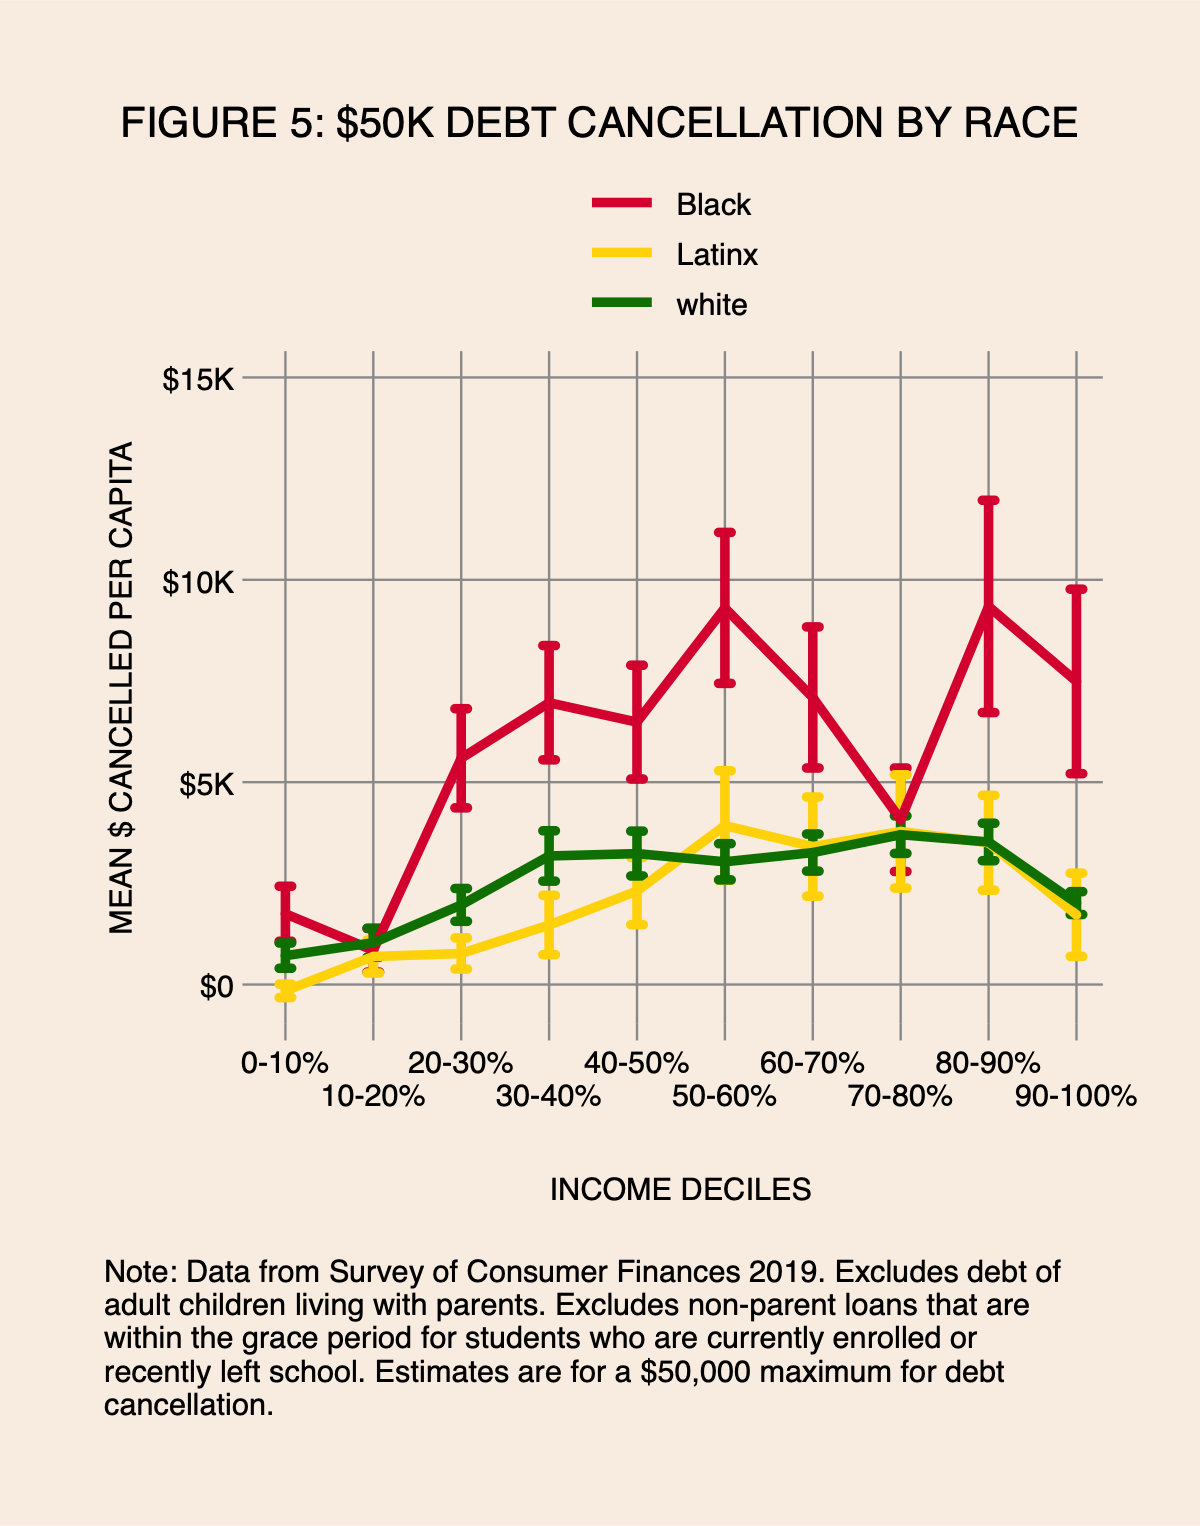

In [5]:
**Mean cancellation
qui regress percapcancel50000 i.incomedecile##i.race i.married [pw=wgt] 

qui margins i.incomedecile#i.race if race<4 

marginsplot, name(high, replace) ytitle(MEAN $ CANCELLED PER CAPITA) ///
ylabel(0 "$0" 5000 "$5K" 10000 "$10K" 15000 "$15K") scheme(dubois) ///
title("FIGURE 5: $50K DEBT CANCELLATION BY RACE", size(3.5)) legend(pos(12)) xlabel(,alternate) ///
xscale(titlegap(large)) xtitle(INCOME DECILES) graphregion(margin(large)) ///
note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of" ///
        "adult children living with parents. Excludes non-parent loans that are" ///
        "within the grace period for students who are currently enrolled or" ///
        "recently left school. Estimates are for a $50,000 maximum for debt" ///
        "cancellation.", size(small) xoffset(0)) graphregion(margin(large)) 

qui graph export figures/f5_cancelincomerace.pdf, replace